In [ ]:
import pandas as pd

# Load the uploaded CSV file with no header
file_path = "/content/Ch12Ex13.csv"
data = pd.read_csv(file_path, header=None)

# Display the first few rows of the dataset to confirm it loaded correctly
data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


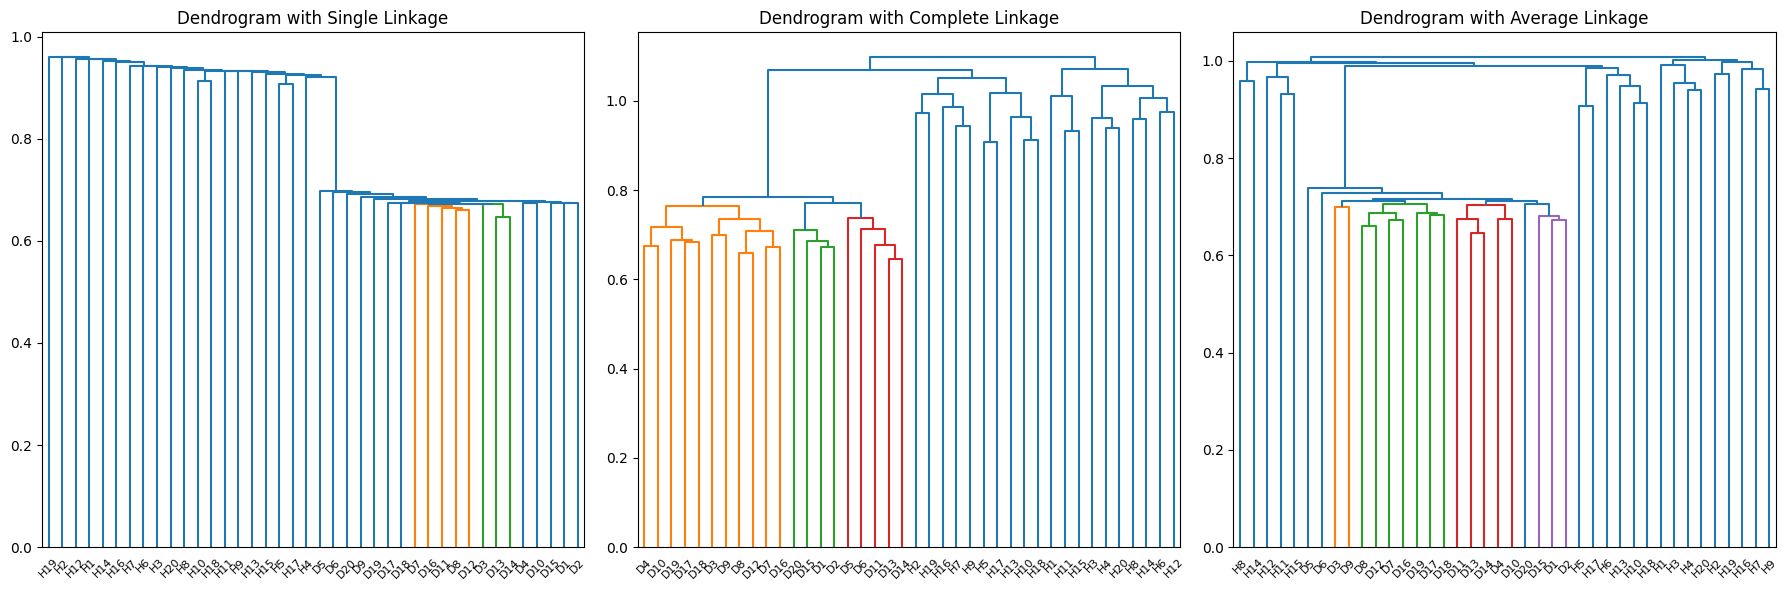

In [ ]:
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Compute the condensed correlation-based distance matrix (1 - Pearson correlation)
condensed_distance_matrix = pdist(data.T, metric='correlation')

# Apply hierarchical clustering with different linkage methods and plot dendrograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
linkage_methods = ['single', 'complete', 'average']

for i, method in enumerate(linkage_methods):
    linkage_matrix = sch.linkage(condensed_distance_matrix, method=method)
    sch.dendrogram(linkage_matrix, labels=[f'H{i+1}' if i < 20 else f'D{i-19}' for i in range(40)], ax=axes[i])
    axes[i].set_title(f'Dendrogram with {method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

So, here we have the dendrograms for single, complete and average linkage clustering. Thus our analysis is as follows:-

1.) Single Linkage


*   The dendrogram shows less distinct separation between the two groups.
*   Some diseased and healthy samples are mixed which indicates that this method has difficulty in separating the two clusters.

2.) Complete Linkage

*   This dendrogram displays a clearer separation of the two groups.
*   Healthy and diseased samples forms two distinct branches, though there may still be some outliers.

3.) Average Linkage

*   This provides a moderately good separation.
*   The two groups are largely distinct, though some overlap can still be seen.

**CONCLUSION**

*   Single Linkage:- Poor Separation
*   Complete Linkage:- Best Separation with compact clusters for healthy and diseased samples.
*   Average Linkage:- Good Separation, though not as tight as the complete separation.

Thus, Complete Linkage is the most effective method for clustering these samples into two distinct groups.

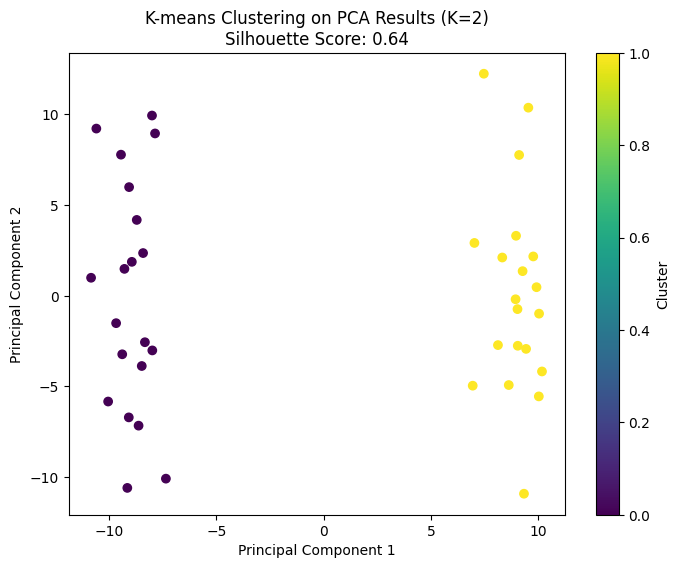

0.6407385064610391

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Rescale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.T)  # Transpose so samples are rows

# Step 2: Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Step 3: Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_result)

# Step 4: Calculate silhouette score
silhouette_avg = silhouette_score(pca_result, cluster_labels)

# Step 5: Plot the clusters and principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering on PCA Results (K=2)\nSilhouette Score: {silhouette_avg:.2f}')
plt.colorbar(label='Cluster')
plt.show()

silhouette_avg

So, here after scaling the data, we have applied PCA to rduce the dimesionality of the gene expression data to two principal components.

K-means clustering with K=2 was applied on the two principal components.

Here, we got a silhoutte score of 0.6407 and the silhoutte score usually ranges from -1 to 1, where higher values indicate better defined clusters. Thus, a score of 0.6407 indicates moderate to good clustering, meaning that the samples are well separated into two clusters.

The score and visualization indicate that the data divides fairly well into two clusters, though some overlap may still exist.

Thus, PCA followed by K-means shows a good separation between the two clusters.